In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('liver_cirrhosis.csv')

In [4]:
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [8]:
y = df['Stage']
X = df.drop('Stage', axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.3, random_state = 0)

In [10]:
cat_cols = make_column_selector(dtype_include=object)(X_train)
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [11]:
num_cols = make_column_selector(dtype_include=np.number)(X_train)
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

# Steps involved in conventional method without using pipeline

# Preprocessing

# Step 1: Standardizing numerical columns
# Step 2: Categorical encoding
# Step 3: Concatenation o/p of step1 and step2

In [12]:
scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(X_train[num_cols])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
train_cat_encoded = encoder.fit_transform(X_train[cat_cols])

train_preprocessed = np.concatenate((train_num_scaled, train_cat_encoded), axis=1)
columns = np.append(num_cols, encoder.get_feature_names_out(cat_cols))
train_preprocessed_df = pd.DataFrame(train_preprocessed, columns=columns, index=X_train.index)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
train_preprocessed_df.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
15705  0.416702  0.416439   0.014440     0.093051  0.708955  0.178082   
6016   0.289651  0.684862   0.014440     0.150762  0.552239  0.160357   
24764  0.140303  0.668591   0.018051     0.150762  0.694030  0.092466   
11962  0.385570  0.769421   0.010830     0.150762  0.518657  0.160357   
15824  0.922592  0.177462   0.057762     0.083988  0.649254  0.474315   

       Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  Status_CL  \
15705  0.057171  0.143885       0.180531   0.494689     0.122222        0.0   
6016   0.124778  0.223268       0.162305   0.159332     0.177778        0.0   
24764  0.124778  0.165468       0.162305   0.259484     0.222222        0.0   
11962  0.124778  0.223268       0.162305   0.353566     0.088889        0.0   
15824  0.744677  0.375934       0.256637   0.229135     0.222222        0.0   

       Status_D  Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  \
15705       0.0           1.0    0.0        1.0             0.0        1.0   
6016        0.0           1.0    0.0        1.0             0.0        1.0   
24764       1.0           1.0    0.0        0.0             1.0        0.0   
11962       0.0           1.0    0.0        0.0             0.0        0.0   
15824       0.0           0.0    0.0        0.0             0.0        0.0   

       Edema_S  Edema_Y  
15705      0.0      0.0  
6016       0.0      0.0  
24764      0.0      0.0  
11962      1.0      0.0  
15824      0.0      0.0

# Step 4: Repeating step 1 to 3

In [14]:
test_num_scaled = scaler.transform(X_test[num_cols])
test_cat_encoded = encoder.transform(X_test[cat_cols])
test_preprocessed = np.concatenate((test_num_scaled, test_cat_encoded), axis=1)
test_preproc_df = pd.DataFrame(test_preprocessed, columns=columns, index=X_test.index)

In [15]:
test_preproc_df.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
14149  0.288599  0.226748   0.617329     1.000000  0.548507  0.344178   
8946   0.843290  0.570071   0.036101     0.078550  0.574627  0.075342   
22378  0.794910  0.425415   0.054152     0.205438  0.518657  0.246575   
12162  0.620320  0.483309   0.028881     0.168580  0.611940  0.128425   
4879   0.573833  0.405469   0.028881     0.209063  0.727612  0.136986   

       Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  Status_CL  \
14149  0.130844  0.323741       0.113274   0.112291     0.211111        0.0   
8946   0.062549  0.104317       0.122124   0.028832     0.433333        0.0   
22378  0.087156  0.190647       0.150442   0.166920     0.133333        0.0   
12162  0.234503  0.298561       0.210619   0.321700     0.122222        0.0   
4879   0.110363  0.701439       0.269027   0.301973     0.111111        0.0   

       Status_D  Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  \
14149       1.0           1.0    0.0        0.0             1.0        1.0   
8946        0.0           0.0    0.0        0.0             1.0        0.0   
22378       0.0           1.0    1.0        0.0             0.0        0.0   
12162       0.0           0.0    0.0        0.0             0.0        0.0   
4879        1.0           1.0    0.0        0.0             0.0        1.0   

       Edema_S  Edema_Y  
14149      0.0      0.0  
8946       1.0      0.0  
22378      0.0      0.0  
12162      0.0      0.0  
4879       0.0      0.0

In [16]:
train_preprocessed_df.shape, test_preproc_df.shape

((17500, 20), (7500, 20))

In [17]:
test_preproc_df.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
14149  0.288599  0.226748   0.617329     1.000000  0.548507  0.344178   
8946   0.843290  0.570071   0.036101     0.078550  0.574627  0.075342   
22378  0.794910  0.425415   0.054152     0.205438  0.518657  0.246575   
12162  0.620320  0.483309   0.028881     0.168580  0.611940  0.128425   
4879   0.573833  0.405469   0.028881     0.209063  0.727612  0.136986   

       Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  Status_CL  \
14149  0.130844  0.323741       0.113274   0.112291     0.211111        0.0   
8946   0.062549  0.104317       0.122124   0.028832     0.433333        0.0   
22378  0.087156  0.190647       0.150442   0.166920     0.133333        0.0   
12162  0.234503  0.298561       0.210619   0.321700     0.122222        0.0   
4879   0.110363  0.701439       0.269027   0.301973     0.111111        0.0   

       Status_D  Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  \
14149       1.0           1.0    0.0        0.0             1.0        1.0   
8946        0.0           0.0    0.0        0.0             1.0        0.0   
22378       0.0           1.0    1.0        0.0             0.0        0.0   
12162       0.0           0.0    0.0        0.0             0.0        0.0   
4879        1.0           1.0    0.0        0.0             0.0        1.0   

       Edema_S  Edema_Y  
14149      0.0      0.0  
8946       1.0      0.0  
22378      0.0      0.0  
12162      0.0      0.0  
4879       0.0      0.0

# Step 5: Running ML Model on top of Step 4 o/p

In [18]:
rf = RandomForestClassifier()

In [19]:
parameters = {
  'n_estimators':[5,10,50, 100],
  'min_samples_split': [2,3,4],
  'criterion': ['gini', 'entropy'] }

In [20]:
rf_grid = GridSearchCV(rf, parameters)
rf_grid.fit(train_preprocessed_df,y_train)

rf_grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 100}

In [21]:
y_pred = rf_grid.predict(test_preproc_df)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9512


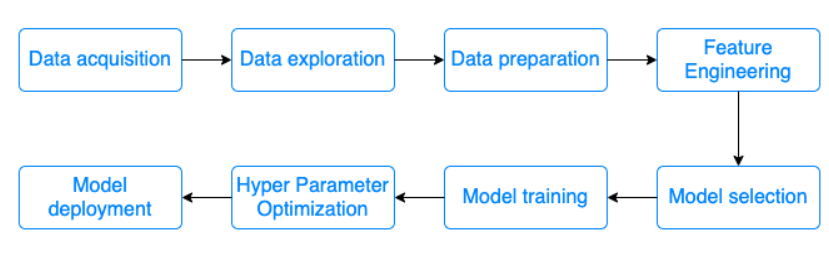
